In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import pickle
import re
import os
import joblib

In [2]:
import nltk.corpus
from nltk.stem import WordNetLemmatizer
from nltk import tokenize
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [4]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [5]:
train

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [14]:
train["tweet"][31960]

'@user #sikh #temple vandalised in in #calgary, #wso condemns  act  '

In [16]:
test

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


In [17]:
train=train.drop("id",axis=1)

In [18]:
test=test.drop("id",axis=1)

# 1--> means hate speech
# 0--> means not a hate speech

In [19]:
train

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


In [20]:
test

,tweet
0,#studiolife #aislife #requires #passion #dedic...
1,@user #white #supremacists want everyone to s...
2,safe ways to heal your #acne!! #altwaystohe...
3,is the hp and the cursed child book up for res...
4,"3rd #bihday to my amazing, hilarious #nephew..."
...,...
17192,thought factory: left-right polarisation! #tru...
17193,feeling like a mermaid ð #hairflip #neverre...
17194,#hillary #campaigned today in #ohio((omg)) &am...
17195,"happy, at work conference: right mindset leads..."


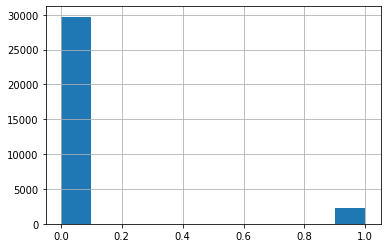

In [21]:
#PLOTTING HISTOGRAM
train['label'].hist()
plt.show()

Our dataset is imbalanced, so just to balance it we loaded many dataset and combined the datasets so that we get a balanced data set containing nearly equal number of both the classes

In [22]:
train2=pd.read_csv("labeled_data.csv")

In [23]:
train2

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


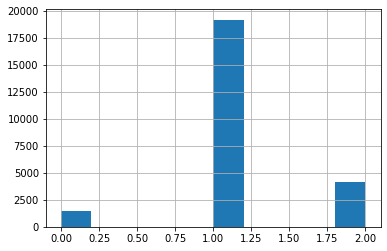

In [24]:
#PLOTTING HISTOGRAM
train2['class'].hist()
plt.show()

this dataset contains three levels of hate speech level 0,1,2
We have added all hate tweets to our existing data so that we can get a balanced data

In [25]:
train2["label"]=1
train2 = pd.DataFrame(train2[['label',"tweet"]])

In [26]:
#Concatinating both dataframes
train = [train, train2]
result = pd.concat(train)

<AxesSubplot:>

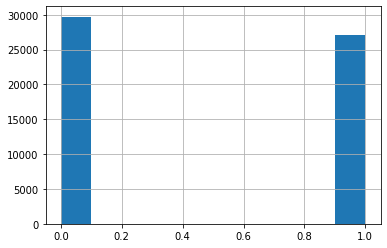

In [27]:
# shuffling data and reseting index
result=shuffle(result)
result = result.reset_index(drop=True)

#Plotting histogram
result['label'].hist()

In [28]:
result

,label,tweet
0,1,You ain't trynna fuc ? Get ya shoes hoe
1,1,"You are a BOY you DONT say ""clutch"" fag ass. T..."
2,0,father's day dad!ðâ¤ððððð
3,0,trip #trip #bike #free #time #crazy #nobað ...
4,1,@ArtbyLecardin @Amy0813Amy @Deeiiggee until th...
...,...,...
56740,1,RT @_ImtrILLasFuk: If her pussy got over 10 bo...
56741,1,"bitches already twerkin on cinegram, this shit..."
56742,0,happy^ at work conference: right mindset leads...
56743,0,what will be will be #poor #rich #single #mar...


In [33]:
result["tweet"][56744]

'good afternoon sweety! ð\x9f\x98\x83 send me letter â\x99\x8bï¸\x8f  '

In [19]:
#checking for null values
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56745 entries, 0 to 56744
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   56745 non-null  int64 
 1   tweet   56745 non-null  object
dtypes: int64(1), object(1)
memory usage: 886.8+ KB


In [20]:
# Storing stopwords of english language from nltk library
sw = set(stopwords.words("english"))

In [21]:
# remove stop words
def filter_words(word_list):
    useful_words = [ w for w in word_list if w not in sw ]
    return(useful_words)

In [22]:
def preprocess_data(dataset):
    data = dataset.copy()
    data['tl'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]',' ',text)) for text in li]) for li in data['tweet']]
    
    a=[]
    for text in data['tl']:
        word_list = word_tokenize(text)
        text=filter_words(word_list)
        a.append(text)  
    
    train_text = []
    for i in a:
        sent=''
        for  j in i:
            sent += str(j) + ' '
        train_text.append(sent)

    data['cleaned_tweets'] = train_text
    
    #Using TF-IDF vectorizer
    vect = TfidfVectorizer(ngram_range = (1,3)).fit(data['cleaned_tweets'])
    
    #Transforming our data using the vector trained on training data.  
    vectorized_tweets = vect.transform(data['cleaned_tweets'])
    
    return vectorized_tweets, vect

In [23]:
#storing preprocessed data in data_train and vector in vect
data_train,vect  = preprocess_data(result)

In [24]:
data_target = np.array(result["label"])

In [25]:
print(data_train.shape, data_target.shape)

(56745, 702295) (56745,)


In [26]:
data_train[0].toarray()[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data_train, data_target, test_size=0.2, random_state=44)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(45396, 702295) (45396,) (11349, 702295) (11349,)


In [40]:
X_train[0].toarray()[0].shape

(702295,)

In [29]:
# we are using logistic regression  
lg_reg_clf = LogisticRegression(C=50)

In [30]:
#Calculating cross-val score
score = cross_val_score(lg_reg_clf, X_train, y_train, cv=3)

C:\Users\narendra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\narendra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

In [31]:
score

array([0.95763944, 0.95578906, 0.95618557])

In [32]:
model = lg_reg_clf.fit(X_train, y_train)

C:\Users\narendra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
print("Accuracy   :\t",lg_reg_clf.score(X_test,y_test))

Accuracy   :	 0.9631685611067055


In [63]:
def preprocess(dataset,vect):
    data = dataset.copy()
    data['tl'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]',' ',text)) for text in li]) for li in data['tweet']]
    
    a=[]
    for text in data['tl']:
        word_list = word_tokenize(text)
        text=filter_words(word_list)
        a.append(text)  
    
    train_text = []
    for i in a:
        sent=''
        for  j in i:
            sent += str(j) + ' '
        train_text.append(sent)

    data['cleaned_tweets'] = train_text
    
    #Transforming our data using the vector trained on training data.  
    vectorized_tweets = vect.transform(data['cleaned_tweets'])
    
    return vectorized_tweets

In [74]:
lol=["@user when a father is dysfunctional and is s."]
lol=pd.DataFrame(lol,columns=["tweet"])

In [75]:
lol

,tweet
0,@user when a father is dysfunctional and is s.


In [76]:
vt=preprocess(lol,vect)

In [84]:
l=lg_reg_clf.predict(vt)

In [86]:
l[0]

0

In [ ]:
with open('model','wb') as f:
    pickle.dump(model,f)

In [ ]:
with open('vector','wb') as f:
    pickle.dump(vect,f)